## Import

In [ ]:
import os
import cv2

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:

device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device) # change allocation of current GPU
print ('Current cuda device ', torch.cuda.current_device()) # check

Current cuda device  0


In [4]:
def fix_all_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

fix_all_seeds(37)

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#os.chdir('/content/gdrive/MyDrive/sw_ai')

## Utils

In [6]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

## Custom Dataset

In [7]:
train_img_dir = './pro_data/data_for_training_and_testing/train/images/'
train_mask_dir = './pro_data/data_for_training_and_testing/train/masks/'

valid_img_dir = './pro_data/data_for_training_and_testing/val/images/'
valid_mask_dir = './pro_data/data_for_training_and_testing/val/masks/'

In [8]:
data_train_img = sorted(os.listdir(train_img_dir))
data_train_mask = sorted(os.listdir(train_mask_dir))

data_val_img = sorted(os.listdir(valid_img_dir))
data_val_mask = sorted(os.listdir(valid_mask_dir))

In [9]:
df_train = pd.DataFrame({'img_path': data_train_img, 'mask_path': data_train_mask})
df_valid = pd.DataFrame({'img_path': data_val_img, 'mask_path': data_val_mask})

In [15]:
class SatelliteDataset(Dataset):
    def __init__(self, csv_file, chk=0, transform=None, infer=False):
        self.data = pd.read_csv(csv_file)
        for i in range(len(self.data.iloc[:,1] )):
          self.data.iloc[:,1][i]=self.data.iloc[:,1][i].replace("./", "/")
        self.data.iloc[:,1] = "./data/" + self.data.iloc[:,1]
        self.transform = transform
        self.infer = infer
        self.chk = chk

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 1]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image)
        if self.infer:
            if self.transform:
                image = self.transform(image=image)['image']
                #image = torch.tensor(image, dtype=torch.float32) / 255.0
            return image

        mask_rle = self.data.iloc[idx, 2]
        mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
            #image = torch.tensor(image, dtype=torch.float32) / 255.0
        patch = 224

        if self.chk == 0:
            return image, mask

        idx = self.chk - 1
        row = idx // 5
        col = idx % 5

        h_start = row * patch
        h_end = h_start + patch
        w_start = col * patch
        w_end = w_start + patch

        image = image[:, h_start:h_end, w_start:w_end]
        mask  = mask[h_start:h_end, w_start:w_end]

        return image, mask



## Data Loader

In [17]:
transform = A.Compose(
    [ 
        A.Resize(1120, 1120),
        A.Normalize(),
        ToTensorV2()
    ]
)

dataset1 = SatelliteDataset(csv_file='./train.csv', chk=1, transform=transform)
dataset2 = SatelliteDataset(csv_file='./train.csv', chk=2, transform=transform)
dataset3 = SatelliteDataset(csv_file='./train.csv', chk=3, transform=transform)
dataset4 = SatelliteDataset(csv_file='./train.csv', chk=4, transform=transform)
dataset5 = SatelliteDataset(csv_file='./train.csv', chk=5, transform=transform)
dataset6 = SatelliteDataset(csv_file='./train.csv', chk=6, transform=transform)
dataset7 = SatelliteDataset(csv_file='./train.csv', chk=7, transform=transform)
dataset8 = SatelliteDataset(csv_file='./train.csv', chk=8, transform=transform)
dataset9 = SatelliteDataset(csv_file='./train.csv', chk=9, transform=transform)
dataset10 = SatelliteDataset(csv_file='./train.csv', chk=10, transform=transform)
dataset11 = SatelliteDataset(csv_file='./train.csv', chk=11, transform=transform)
dataset12 = SatelliteDataset(csv_file='./train.csv', chk=12, transform=transform)
dataset13 = SatelliteDataset(csv_file='./train.csv', chk=13, transform=transform)
dataset14 = SatelliteDataset(csv_file='./train.csv', chk=14, transform=transform)
dataset15 = SatelliteDataset(csv_file='./train.csv', chk=15, transform=transform)
dataset16 = SatelliteDataset(csv_file='./train.csv', chk=16, transform=transform)
dataset25 = SatelliteDataset(csv_file='./train.csv', chk=25, transform=transform)
dataset17 = SatelliteDataset(csv_file='./train.csv', chk=17, transform=transform)
dataset18 = SatelliteDataset(csv_file='./train.csv', chk=18, transform=transform)
dataset19 = SatelliteDataset(csv_file='./train.csv', chk=19, transform=transform)
dataset20 = SatelliteDataset(csv_file='./train.csv', chk=20, transform=transform)
dataset21 = SatelliteDataset(csv_file='./train.csv', chk=21, transform=transform)
dataset22 = SatelliteDataset(csv_file='./train.csv', chk=22, transform=transform)
dataset23 = SatelliteDataset(csv_file='./train.csv', chk=23, transform=transform)
dataset24 = SatelliteDataset(csv_file='./train.csv', chk=24, transform=transform)


In [18]:
transform1 = A.Compose(
    [
        A.Resize(1120, 1120),
        A.HorizontalFlip(p=1),
        A.VerticalFlip(p=1),
        A.ShiftScaleRotate(p=1),
        A.Normalize(),
        ToTensorV2()
    ]
)

ddataset1 = SatelliteDataset(csv_file='./train.csv', chk=1, transform=transform1)
ddataset2 = SatelliteDataset(csv_file='./train.csv', chk=2, transform=transform1)
ddataset3 = SatelliteDataset(csv_file='./train.csv', chk=3, transform=transform1)
ddataset4 = SatelliteDataset(csv_file='./train.csv', chk=4, transform=transform1)
ddataset5 = SatelliteDataset(csv_file='./train.csv', chk=5, transform=transform1)
ddataset6 = SatelliteDataset(csv_file='./train.csv', chk=6, transform=transform1)
ddataset7 = SatelliteDataset(csv_file='./train.csv', chk=7, transform=transform1)
ddataset8 = SatelliteDataset(csv_file='./train.csv', chk=8, transform=transform1)
ddataset9 = SatelliteDataset(csv_file='./train.csv', chk=9, transform=transform1)
ddataset10 = SatelliteDataset(csv_file='./train.csv', chk=10, transform=transform1)
ddataset11 = SatelliteDataset(csv_file='./train.csv', chk=11, transform=transform1)
ddataset12 = SatelliteDataset(csv_file='./train.csv', chk=12, transform=transform1)
ddataset13 = SatelliteDataset(csv_file='./train.csv', chk=13, transform=transform1)
ddataset14 = SatelliteDataset(csv_file='./train.csv', chk=14, transform=transform1)
ddataset15 = SatelliteDataset(csv_file='./train.csv', chk=15, transform=transform1)
ddataset16 = SatelliteDataset(csv_file='./train.csv', chk=16, transform=transform1)
ddataset25 = SatelliteDataset(csv_file='./train.csv', chk=25, transform=transform1)
ddataset17 = SatelliteDataset(csv_file='./train.csv', chk=17, transform=transform1)
ddataset18 = SatelliteDataset(csv_file='./train.csv', chk=18, transform=transform1)
ddataset19 = SatelliteDataset(csv_file='./train.csv', chk=19, transform=transform1)
ddataset20 = SatelliteDataset(csv_file='./train.csv', chk=20, transform=transform1)
ddataset21 = SatelliteDataset(csv_file='./train.csv', chk=21, transform=transform1)
ddataset22 = SatelliteDataset(csv_file='./train.csv', chk=22, transform=transform1)
ddataset23 = SatelliteDataset(csv_file='./train.csv', chk=23, transform=transform1)
ddataset24 = SatelliteDataset(csv_file='./train.csv', chk=24, transform=transform1)

In [19]:
dataloader = DataLoader(dataset1+dataset2+dataset3+dataset4+dataset5+dataset6+dataset7+dataset8+dataset9+dataset10+dataset11+dataset12+dataset13+dataset14+dataset15+dataset16+dataset17+dataset18+dataset19+dataset20+dataset21+dataset22+dataset23+dataset24+dataset25\
                        +ddataset1+ddataset2+ddataset3+ddataset4+ddataset5+ddataset6+ddataset7+ddataset8+ddataset9+ddataset10+ddataset11+ddataset12+ddataset13+ddataset14+ddataset15+ddataset16+ddataset17+ddataset18+ddataset19+ddataset20+ddataset21+ddataset22+ddataset23+ddataset24, batch_size=64, shuffle=True, num_workers=48)

In [ ]:
valid_dataloader = DataLoader(validset, batch_size=64, shuffle=False, num_workers=48)

In [ ]:

datasets = [
    dataset1, dataset2, dataset3, dataset4, dataset5,
    dataset6, dataset7, dataset8, dataset9, dataset10,
    dataset11, dataset12, dataset13, dataset14, dataset15,
    dataset16, dataset17, dataset18, dataset19, dataset20,
    dataset21, dataset22, dataset23, dataset24, dataset25,
]

plt.figure(figsize=(10, 10))

for i, ds in enumerate(datasets):
    plt.subplot(5, 5, i + 1)
    img = ds[0][0].cpu().numpy().transpose(1, 2, 0)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [ ]:
datasets = [
    ddataset1, ddataset2, ddataset3, ddataset4, ddataset5,
    ddataset6, ddataset7, ddataset8, ddataset9, ddataset10,
    ddataset11, ddataset12, ddataset13, ddataset14, ddataset15,
    ddataset16, ddataset17, ddataset18, ddataset19, ddataset20,
    ddataset21, ddataset22, ddataset23, ddataset24, ddataset25,
]

plt.figure(figsize=(10, 10))

for i, ds in enumerate(datasets):
    plt.subplot(5, 5, i + 1)
    img = ds[0][0].cpu().numpy().transpose(1, 2, 0)
    plt.imshow(img)
    plt.axis("off")

plt.show()

## Define Model

In [ ]:

resnet = torchvision.models.resnet.resnet50(pretrained=True)


class ConvBlock(nn.Module):
    """
    Helper module that consists of a Conv -> BN -> ReLU
    """

    def __init__(self, in_channels, out_channels, padding=1, kernel_size=3, stride=1, with_nonlinearity=True):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, padding=padding, kernel_size=kernel_size, stride=stride)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.with_nonlinearity = with_nonlinearity

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        if self.with_nonlinearity:
            x = self.relu(x)
        return x


class Bridge(nn.Module):
    """
    This is the middle layer of the UNet which just consists of some
    """

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.bridge = nn.Sequential(
            ConvBlock(in_channels, out_channels),
            ConvBlock(out_channels, out_channels)
        )

    def forward(self, x):
        return self.bridge(x)


class UpBlockForUNetWithResNet50(nn.Module):
    """
    Up block that encapsulates one up-sampling step which consists of Upsample -> ConvBlock -> ConvBlock
    """

    def __init__(self, in_channels, out_channels, up_conv_in_channels=None, up_conv_out_channels=None,
                 upsampling_method="conv_transpose"):
        super().__init__()

        if up_conv_in_channels == None:
            up_conv_in_channels = in_channels
        if up_conv_out_channels == None:
            up_conv_out_channels = out_channels

        if upsampling_method == "conv_transpose":
            self.upsample = nn.ConvTranspose2d(up_conv_in_channels, up_conv_out_channels, kernel_size=2, stride=2)
        elif upsampling_method == "bilinear":
            self.upsample = nn.Sequential(
                nn.Upsample(mode='bilinear', scale_factor=2),
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)
            )
        self.conv_block_1 = ConvBlock(in_channels, out_channels)
        self.conv_block_2 = ConvBlock(out_channels, out_channels)

    def forward(self, up_x, down_x):
        """

        :param up_x: this is the output from the previous up block
        :param down_x: this is the output from the down block
        :return: upsampled feature map
        """
        x = self.upsample(up_x)
        x = torch.cat([x, down_x], 1)
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return x


class UNetWithResnet50Encoder(nn.Module):
    DEPTH = 6

    def __init__(self, n_classes=1):
        super().__init__()
        resnet = torchvision.models.resnet.resnet50(pretrained=True)
        down_blocks = []
        up_blocks = []
        self.input_block = nn.Sequential(*list(resnet.children()))[:3]
        self.input_pool = list(resnet.children())[3]
        for bottleneck in list(resnet.children()):
            if isinstance(bottleneck, nn.Sequential):
                down_blocks.append(bottleneck)
        self.down_blocks = nn.ModuleList(down_blocks)
        self.bridge = Bridge(2048, 2048)
        up_blocks.append(UpBlockForUNetWithResNet50(2048, 1024))
        up_blocks.append(UpBlockForUNetWithResNet50(1024, 512))
        up_blocks.append(UpBlockForUNetWithResNet50(512, 256))
        up_blocks.append(UpBlockForUNetWithResNet50(in_channels=128 + 64, out_channels=128,
                                                    up_conv_in_channels=256, up_conv_out_channels=128))
        up_blocks.append(UpBlockForUNetWithResNet50(in_channels=64 + 3, out_channels=64,
                                                    up_conv_in_channels=128, up_conv_out_channels=64))

        self.up_blocks = nn.ModuleList(up_blocks)

        self.out = nn.Conv2d(64, n_classes, kernel_size=1, stride=1)

    def forward(self, x, with_output_feature_map=False):
        pre_pools = dict()
        pre_pools[f"layer_0"] = x
        x = self.input_block(x)
        pre_pools[f"layer_1"] = x
        x = self.input_pool(x)

        for i, block in enumerate(self.down_blocks, 2):
            x = block(x)
            if i == (UNetWithResnet50Encoder.DEPTH - 1):
                continue
            pre_pools[f"layer_{i}"] = x

        x = self.bridge(x)

        for i, block in enumerate(self.up_blocks, 1):
            key = f"layer_{UNetWithResnet50Encoder.DEPTH - 1 - i}"
            x = block(x, pre_pools[key])
        output_feature_map = x
        x = self.out(x)
        del pre_pools
        if with_output_feature_map:
            return x, output_feature_map
        else:
            return x

/home/aicom/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aicom/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Model Train

In [23]:
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings("ignore")

In [ ]:
# model 초기화

#model = ResNetUNet(1)
model = UNetWithResnet50Encoder()
model = nn.DataParallel(model,device_ids = [0,1,2,3,4,5,6,7])
model.to(device)

# loss function과 optimizer 정의
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# training loop
for epoch in range(1):  # 10 에폭 동안 학습합니다.
    model.train()
    epoch_loss = 0
    for images, masks in tqdm(dataloader):
        images = images.float().to(device)
        masks = masks.float().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        #lr_scheduler.step()
    print(f'Epoch {epoch+1}, Loss: {epoch_loss/len(dataloader)}')

100%|██████████| 6151/6151 [1:42:01<00:00,  1.00it/s]

Epoch 1, Loss: 0.08583677158309587


In [25]:
epoch = 7
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, './model(b=64,agu-re,7).pth')

In [24]:
model = UNetWithResnet50Encoder()
model = nn.DataParallel(model,device_ids = [0,1,2,3,4,5,6,7])
model.to(device)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

checkpoint = torch.load('./model(b=64,agu-re,6).pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

for epoch in range(1):  # 10 에폭 동안 학습합니다.
    model.train()
    epoch_loss = 0
    for images, masks in tqdm(dataloader):
        images = images.float().to(device)
        masks = masks.float().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks.unsqueeze(1))
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {epoch_loss/len(dataloader)}')

100%|██████████| 6151/6151 [1:57:33<00:00,  1.15s/it]

Epoch 1, Loss: 0.03683130316699138


In [23]:
model = UNetWithResnet50Encoder()
model = nn.DataParallel(model,device_ids = [0,1,2,3,4,5,6,7])
model.to(device)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
checkpoint = torch.load('./model(b=64,agu-re,7).pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [57]:
with torch.no_grad():
    model.eval()
    result = []
    for images, mask in tqdm(valid_dataloader):
        images = images.float().to(device)

        outputs = model(images)
        masks = torch.sigmoid(outputs).cpu().numpy()
        masks = np.squeeze(masks, axis=1)
        masks = (masks > 0.35).astype(np.uint8) # Threshold = 0.35

        for i in range(len(images)):
            mask_rle = rle_encode(masks[i])
            if mask_rle == '': # 예측된 건물 픽셀이 아예 없는 경우 -1
                result.append(-1)
            else:
                result.append(mask_rle)

100%|██████████| 191/191 [02:04<00:00,  1.53it/s]


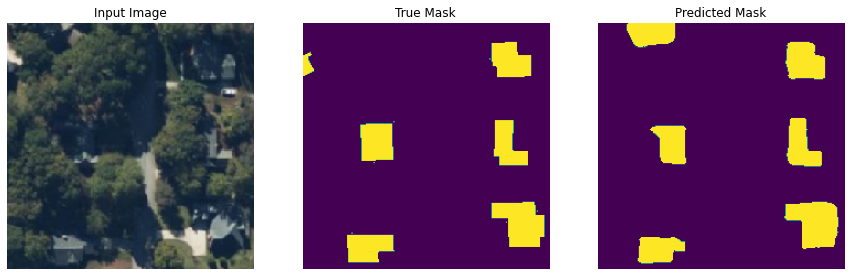

In [58]:
import matplotlib.pyplot as plt

def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        if i == 0:
            img = cv2.imread(display_list[i])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype(np.uint8).copy()
        if i == 1:
            img = cv2.imread(display_list[i], 0)
        if i == 2:
            img = rle_decode(display_list[i], shape = (224, 224)) # shape 설정

        plt.imshow(img)
        plt.axis('off')
    plt.show()

idx = 4

valid_img_path_idx = valid_img_dir + df_valid['img_path'][idx]
valid_mask_path_idx = valid_mask_dir + df_valid['mask_path'][idx]
valid_pred_mask_idx = result[idx]

display_list = [valid_img_path_idx, valid_mask_path_idx, valid_pred_mask_idx]
display(display_list)

## Inference

In [24]:
transform3 = A.Compose(
    [
        A.Resize(224,224),
        A.Normalize(),
        ToTensorV2()
    ]
)

In [25]:
test_dataset = SatelliteDataset(csv_file='./test.csv', transform=transform3, infer=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=48)

In [ ]:
with torch.no_grad():
    model.eval()
    result = []
    for images in tqdm(test_dataloader):
        images = images.float().to(device)

        outputs = model(images)
        #print(outputs)
        masks = torch.sigmoid(outputs).cpu().numpy()
        masks = np.squeeze(masks, axis=1)
        masks = (masks > 0.45).astype(np.uint8) # Threshold = 0.35
        #print(masks)
        for i in range(len(images)):
            mask_rle = rle_encode(masks[i])
            #print(mask_rle)
            if mask_rle == '': # 예측된 건물 픽셀이 아예 없는 경우 -1
                result.append(-1)
            else:
                result.append(mask_rle)

## Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit['mask_rle'] = result

In [ ]:
submit.to_csv('./submit(resnetunet-agu-re-7-64-0.45).csv', index=False)